# BOOKS GOODREADS EDA

### - After meticulously cleaning the dataset to ensure its integrity and consistency, I embarked on exploratory data analysis (EDA) to glean insights and trends from the refined data. This analytical phase involved a systematic examination of various features and attributes within the dataset, aiming to uncover patterns, correlations, and anomalies that could inform subsequent decision-making processes.

### - During the EDA process, I employed a variety of statistical and visual techniques to explore the dataset comprehensively. This included summary statistics, distribution plots, correlation matrices, and other exploratory visualizations tailored to each specific attribute or feature of interest.

### - Through EDA, I gained a deeper understanding of the underlying structure and characteristics of the data, identified potential relationships between variables, and unearthed notable trends or outliers that warranted further investigation. The insights gleaned from EDA provided valuable context and groundwork for subsequent analyses, modeling, and decision-making processes based on the cleaned and refined dataset.

In [68]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [69]:
# Load the data

books_g = pd.read_csv('books_final.csv')
books_g.head()

,title,author,stars,ratings,reviews,synopsis,genre,version,price,number_of_pages,book_format,published_date,published_year,num_books_author,followers_author
0,The Hunger Games,SUZANNE COLLINS,4.34,8601389,216773,"Could you survive on your own in the wild, wit...",Young Adult,Kindle Unlimited,0.00,374,Hardcover,"September 14, 2008",2008,72,997000
1,Harry Potter and the Order of the Phoenix,J.K. ROWLING,4.50,3359608,62879,Harry Potter is about to start his fifth year ...,Young Adult,Kindle Unlimited,0.00,912,Paperback,"June 21, 2003",2003,535,225000
2,Pride and Prejudice,JANE AUSTEN,4.29,4238613,113179,"Since its immediate success in 1813, Pride and...",Classics,Kindle,2.99,279,Paperback,"January 28, 1813",1813,4124,663000
3,To Kill a Mockingbird,HARPER LEE,4.26,6079471,116454,The unforgettable novel of a childhood in a sl...,Classics,Kindle,13.99,323,Paperback,"July 11, 1960",1960,70,135000
4,The Book Thief,MARKUS ZUSAK,4.39,2538383,143787,Librarian's note: An alternate cover edition c...,Historical,Kindle,10.99,592,Hardcover,"September 1, 2005",2005,23,392000


In [70]:
books_g.shape

(6843, 15)

In [71]:
books_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6843 entries, 0 to 6842
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             6843 non-null   object 
 1   author            6843 non-null   object 
 2   stars             6843 non-null   float64
 3   ratings           6843 non-null   int64  
 4   reviews           6843 non-null   int64  
 5   synopsis          6843 non-null   object 
 6   genre             6843 non-null   object 
 7   version           6843 non-null   object 
 8   price             6843 non-null   float64
 9   number_of_pages   6843 non-null   int64  
 10  book_format       6843 non-null   object 
 11  published_date    6843 non-null   object 
 12  published_year    6843 non-null   int64  
 13  num_books_author  6843 non-null   int64  
 14  followers_author  6843 non-null   int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 802.0+ KB


In [72]:
# Summary statistics for numerical columns

numerical_summary = books_g[['stars', 'ratings', 'reviews', 'price', 'number_of_pages', 'published_year', 'num_books_author', 'followers_author']].describe()
numerical_summary

,stars,ratings,reviews,price,number_of_pages,published_year,num_books_author,followers_author
count,6843.000000,6.843000e+03,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000,6843.000000
mean,4.063392,1.618968e+05,9392.370013,7.961273,394.030542,1987.874616,3073.721321,121275.418091
std,0.256804,4.205551e+05,20236.173954,6.005487,277.126211,62.426296,36706.350263,195879.347289
min,1.760000,7.000000e+00,0.000000,0.000000,3.000000,1000.000000,1.000000,0.000000
25%,3.900000,2.156900e+04,1180.500000,2.990000,268.000000,1987.000000,29.000000,1651.500000
50%,4.070000,5.361400e+04,3115.000000,8.990000,352.000000,2006.000000,87.000000,6744.000000
75%,4.240000,1.300390e+05,8428.000000,11.990000,454.500000,2013.000000,274.000000,177000.000000
max,4.930000,9.975607e+06,264137.000000,218.730000,6680.000000,2024.000000,791000.000000,997000.000000


In [73]:
# Check for non_numeric columns

for column in books_g.columns:
    try:
        pd.to_numeric(books_g[column])
    except ValueError:
        print(f"Non-numeric values found in column: {column}")

Non-numeric values found in column: title
Non-numeric values found in column: author
Non-numeric values found in column: synopsis
Non-numeric values found in column: genre
Non-numeric values found in column: version
Non-numeric values found in column: book_format
Non-numeric values found in column: published_date


# 1. **Exploratory Data Analysis (EDA):**
   - Conduct exploratory data analysis to understand the distribution and characteristics of various features such as author, genre, ratings, reviews, publication dates.
   - Visualize distributions of numeric variables using histograms, box plots, and scatter plots.
   - Analyze relationships between different variables using correlation matrices, pair plots, and heatmaps.

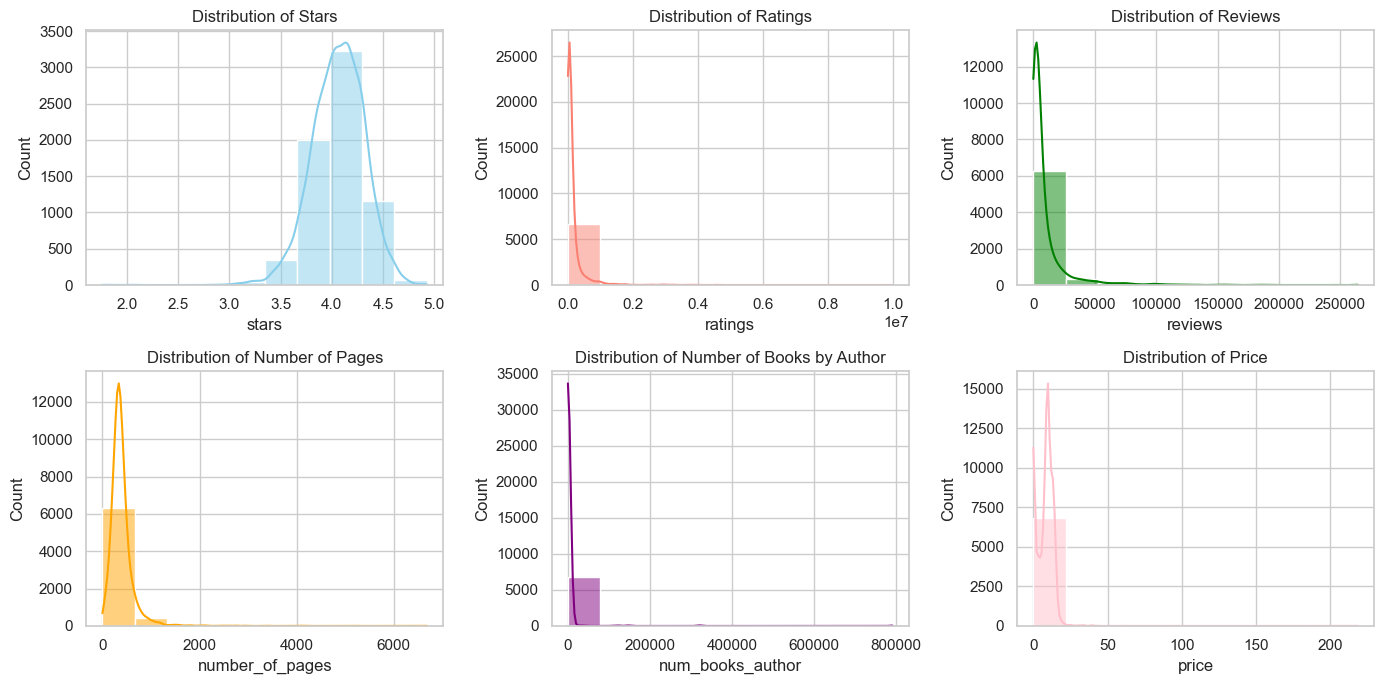

In [74]:
# Set seaborn style
sns.set(style="whitegrid")

# Visualize distributions of numeric variables
plt.figure(figsize=(14, 7))

plt.subplot(2, 3, 1)
sns.histplot(books_g['stars'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Stars')

plt.subplot(2, 3, 2)
sns.histplot(books_g['ratings'], bins=10, kde=True, color='salmon')
plt.title('Distribution of Ratings')

plt.subplot(2, 3, 3)
sns.histplot(books_g['reviews'], bins=10, kde=True, color='green')
plt.title('Distribution of Reviews')

plt.subplot(2, 3, 4)
sns.histplot(books_g['number_of_pages'], bins=10, kde=True, color='orange')
plt.title('Distribution of Number of Pages')

plt.subplot(2, 3, 5)
sns.histplot(books_g['num_books_author'], bins=10, kde=True, color='purple')
plt.title('Distribution of Number of Books by Author')

plt.subplot(2, 3, 6)
sns.histplot(books_g['price'], bins=10, kde=True, color='pink')
plt.title('Distribution of Price')

plt.tight_layout()
plt.show()



In [75]:
# Analyze relationships between different variables

numeric_columns = books_g.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numeric_columns.corr()
correlation_matrix


,stars,ratings,reviews,price,number_of_pages,published_year,num_books_author,followers_author
stars,1.000000,0.071687,0.079239,0.009054,0.222232,0.112226,0.030090,0.061408
ratings,0.071687,1.000000,0.781492,0.016102,0.003349,-0.009940,0.003395,0.259869
reviews,0.079239,0.781492,1.000000,0.068038,0.006879,0.077084,-0.015653,0.319140
price,0.009054,0.016102,0.068038,1.000000,0.306076,0.077135,-0.029570,0.074585
number_of_pages,0.222232,0.003349,0.006879,0.306076,1.000000,-0.007048,0.121764,0.073083
published_year,0.112226,-0.009940,0.077084,0.077135,-0.007048,1.000000,-0.315773,0.046249
num_books_author,0.030090,0.003395,-0.015653,-0.029570,0.121764,-0.315773,1.000000,0.020363
followers_author,0.061408,0.259869,0.319140,0.074585,0.073083,0.046249,0.020363,1.000000


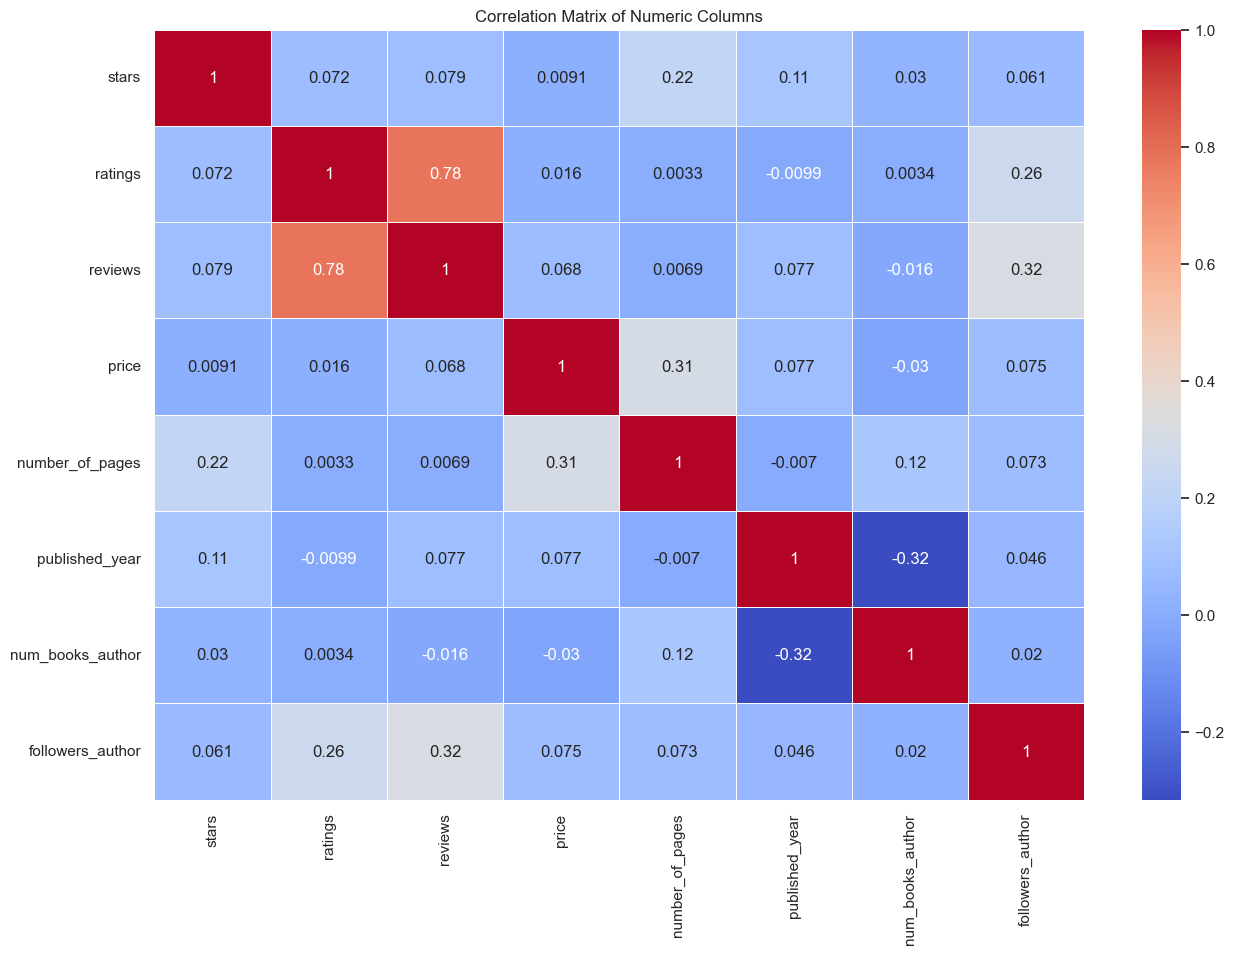

In [76]:
# Visualize the correlation matrix

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

1. **Stars vs. Other Variables**:
   - Stars have a moderate positive correlation with the number of pages (0.222) and a weak positive correlation with published year (0.112). 
   - There's a weak positive correlation between stars and ratings (0.071), reviews (0.079), price (0.009), num_books_author (0.030), and followers_author (0.061).
2. **Ratings vs. Other Variables**:
   - Ratings show a strong positive correlation with reviews (0.781) and a weak positive correlation with followers_author (0.259).
   - There's a weak positive correlation between ratings and stars (0.071), price (0.016), and published year (-0.009).
   
3. **Reviews vs. Other Variables**:
   - Reviews exhibit a strong positive correlation with ratings (0.781) and followers_author (0.319).
   - There's a weak positive correlation between reviews and stars (0.079), price (0.068), and published year (0.077).
4. **Price vs. Other Variables**:
   - Price shows a moderate positive correlation with the number of pages (0.306).
   - There's a weak positive correlation between price and reviews (0.068), followers_author (0.075), and published year (0.077).
5. **Number of Pages vs. Other Variables**:
   - The number of pages has a moderate positive correlation with stars (0.222) and price (0.306).
   - There's a weak positive correlation between the number of pages and ratings (0.003), reviews (0.007), published year (-0.007), num_books_author (0.122), and followers_author (0.073).
6. **Published Year vs. Other Variables**:
   - Published year has a weak positive correlation with stars (0.112) and reviews (0.077).
   - There's a weak negative correlation between published year and ratings (-0.009).
7. **Number of Books Author vs. Other Variables**:
   - The number of books authored has a weak positive correlation with the number of pages (0.122).
   - There's a weak negative correlation between the number of books authored and reviews (-0.016).
8. **Followers Author vs. Other Variables**:
   - Followers of the author show a strong positive correlation with reviews (0.319) and a moderate positive correlation with ratings (0.260).
   - There's a weak positive correlation between followers of the author and stars (0.061), price (0.075), and published year (0.046).


C:\Users\diana\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


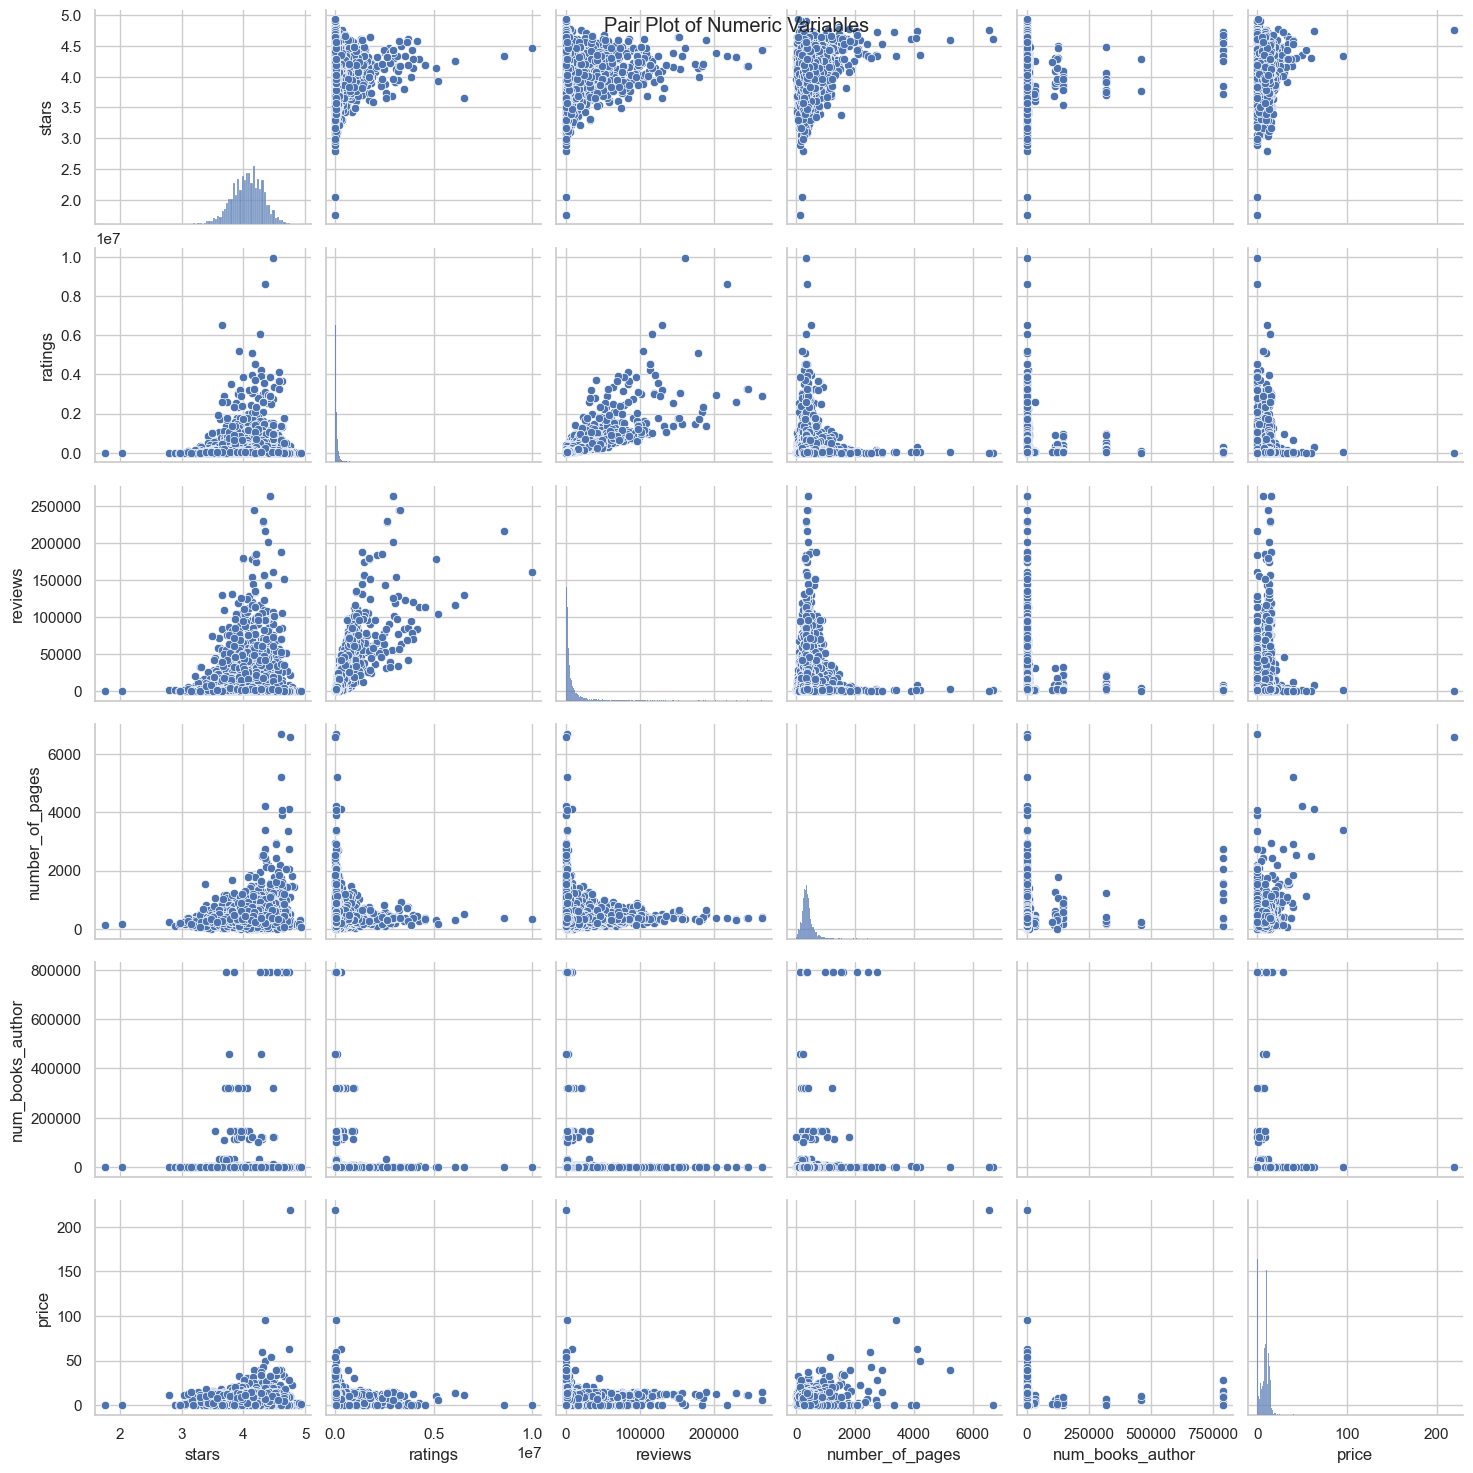

In [10]:
sns.pairplot(books_g[['stars', 'ratings', 'reviews', 'number_of_pages', 'num_books_author', 'price']])
plt.suptitle('Pair Plot of Numeric Variables')
plt.show()


# 2. **Genre Analysis:**
   - Explore the distribution of books across different genres.
   - Identify the most popular genres based on the number of books, ratings, and reviews.
   - Analyze the average ratings and reviews for each genre.
   - Visualize genre trends over time using line plots or bar plots.

## 1. Explore the Distribution of Books Across Different Genres:

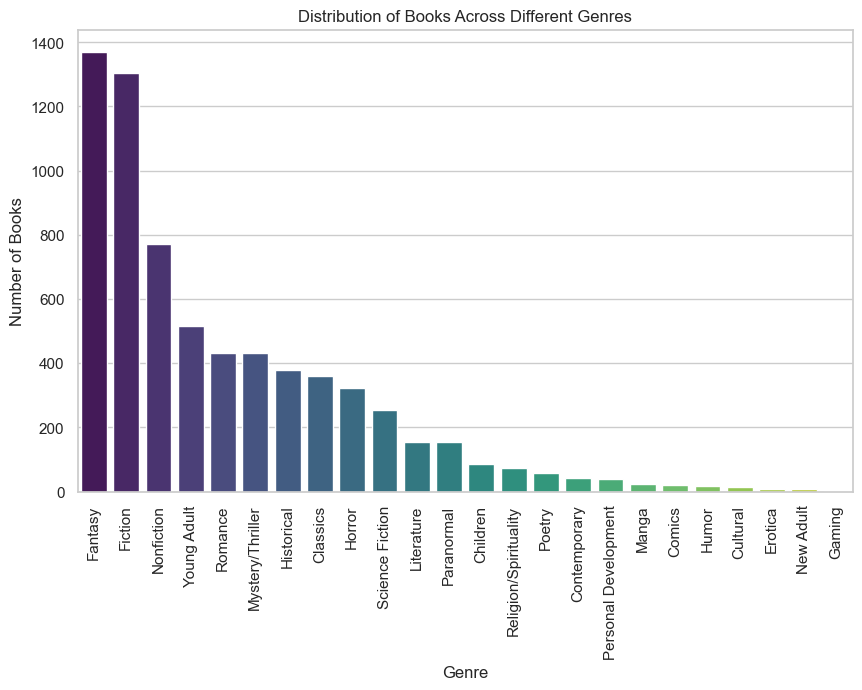

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(data=books_g, x='genre', order=books_g['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Books Across Different Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.xticks(rotation=90)
plt.show()

## 2. Identify the Most Popular Genres:

In [78]:
genre_popularity = books_g.groupby('genre').agg({'ratings': 'sum', 'reviews': 'sum', 'title': 'count'})
genre_popularity = genre_popularity.sort_values(by='title', ascending=False)
print("Most popular genres based on number of books, ratings, and reviews:\n")
print(genre_popularity)

Most popular genres based on number of books, ratings, and reviews:

                         ratings   reviews  title
genre                                            
Fantasy                258767131  15660253   1371
Fiction                233690446  14524881   1305
Nonfiction              85524888   4963494    772
Young Adult            104292814   5479670    517
Romance                 81085342   6027371    433
Mystery/Thriller        63487030   4763097    432
Historical              41447800   2847066    380
Classics               121113014   3684638    360
Horror                  30061768   1689033    321
Science Fiction         30190009   1816663    255
Literature              14093676    846110    155
Paranormal               6030113    268974    153
Children                13225738    339772     87
Religion/Spirituality    3588829    152232     72
Poetry                   4722518    165457     57
Contemporary             6485196    659150     43
Personal Development     450061

## 3. Analyze the Average Ratings and Reviews for Each Genre:

In [79]:
genre_avg_ratings_reviews = books_g.groupby('genre').agg({'ratings': lambda x: round(x.mean(),), 
                                                          'reviews': lambda x: round(x.mean(),)})

print("Average ratings and reviews for each genre:\n")
print(genre_avg_ratings_reviews)

Average ratings and reviews for each genre:

                       ratings  reviews
genre                                  
Children                152020     3905
Classics                336425    10235
Comics                   59912     1241
Contemporary            150819    15329
Cultural                 17334      991
Erotica                   5499      742
Fantasy                 188743    11423
Fiction                 179073    11130
Gaming                      70       11
Historical              109073     7492
Horror                   93650     5262
Humor                    96687     4977
Literature               90927     5459
Manga                    84548     1692
Mystery/Thriller        146961    11026
New Adult                59978     4116
Nonfiction              110784     6429
Paranormal               39413     1758
Personal Development    115400     4767
Poetry                   82851     2903
Religion/Spirituality    49845     2114
Romance                 187264    1

## 4. Visualize Genre Trends Over Time:

In [80]:
genre_counts_by_year = books_g.groupby(['published_year', 'genre']).size().reset_index(name='counts')
genre_counts_by_year

,published_year,genre,counts
0,1000,Poetry,1
1,1001,Classics,1
2,1002,Cultural,1
3,1010,Poetry,1
4,1120,Poetry,1
...,...,...,...
1273,2023,Religion/Spirituality,1
1274,2023,Romance,13
1275,2023,Science Fiction,13
1276,2023,Young Adult,3


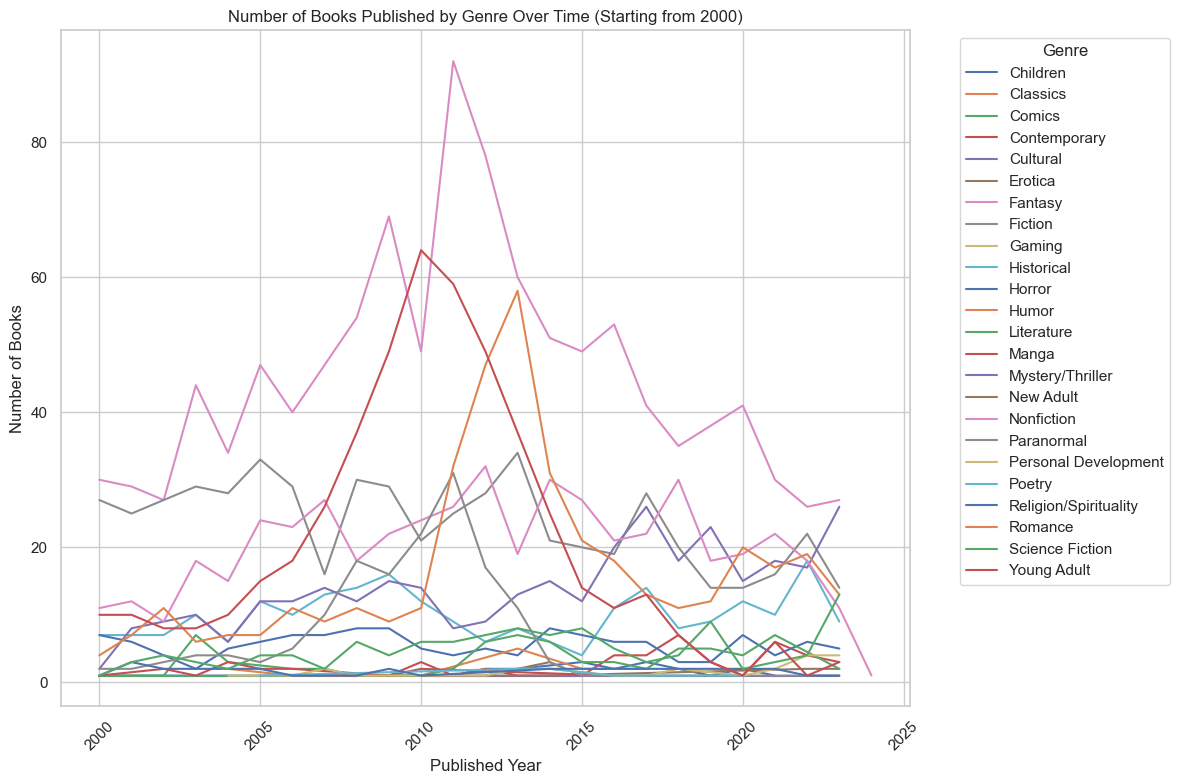

In [89]:
# Filter the data for years starting from 2000
df_filtered = genre_by_year_2000[genre_by_year_2000['published_year'] >= 2000]

# Group the data by genre and published_year, and sum the counts
grouped_df = df_filtered.groupby(['published_year', 'genre']).sum().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
for genre, data in grouped_df.groupby('genre'):
    plt.plot(data['published_year'], data['counts'], label=genre)

plt.title('Number of Books Published by Genre Over Time (Starting from 2000)')
plt.xlabel('Published Year')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [90]:
books_by_year = books_g.groupby('published_year')['title'].count()
books_by_year_sorted = books_by_year.sort_values(ascending=False)
books_by_year_sorted.head()

published_year
2011    296
2012    293
2013    274
2009    245
2010    239
Name: title, dtype: int64

In [91]:
genre_count_by_year = books_g.groupby([books_g['published_year'], 'genre']).size().unstack(fill_value=0)
genre_count_by_year

genre,Children,Classics,Comics,Contemporary,Cultural,Erotica,Fantasy,Fiction,Gaming,Historical,...,Mystery/Thriller,New Adult,Nonfiction,Paranormal,Personal Development,Poetry,Religion/Spirituality,Romance,Science Fiction,Young Adult
published_year,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1001,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1002,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,2,0,0,1,0,0,41,14,0,12,...,15,0,19,0,1,1,0,20,2,1
2021,1,0,0,6,1,0,30,16,0,10,...,18,0,22,1,2,0,2,17,3,6
2022,0,0,0,4,0,2,26,22,0,18,...,17,0,18,0,4,0,1,19,4,1


# 3. **Author Analysis:**
   - Identify the most prolific authors based on the number of books they've written.
   - Analyze the average ratings and reviews for books by each author.
   - Investigate the distribution of genres for each author.
   - Visualize author rankings based on various metrics.

### 3.1. Identify Prolific Authors:

In [92]:
prolific_authors = books_g['author'].value_counts()
prolific_authors.head()

author
STEPHEN KING           66
TERRY PRATCHETT        38
RICK RIORDAN           36
SARAH J. MAAS          29
WILLIAM SHAKESPEARE    26
Name: count, dtype: int64

### 3.2. Analyze Average Ratings and Reviews:

In [93]:
# Calculate average ratings and reviews for each author

avg_ratings_reviews = books_g.groupby('author')[['ratings', 'reviews']].mean()

avg_ratings_reviews = avg_ratings_reviews.round(0).astype(int)

top_avg_ratings = avg_ratings_reviews.sort_values(by='ratings', ascending=False)

print("Top Authors by Ratings:\n")
print(top_avg_ratings)

Top Authors by Ratings:

                    ratings  reviews
author                              
HARPER LEE          4143886    88504
ANNE FRANK          3703948    41223
DELIA OWENS         2945949   201511
WILLIAM GOLDING     2888194    55306
KATHRYN STOCKETT    2747630    90199
...                     ...      ...
AL EWING                 25        3
LISA CHERRY              17        2
KATHERYN KIMBROUGH       14        0
JOHN PALMER JR.          11        2
MARY LEBAR                7        1

[3210 rows x 2 columns]


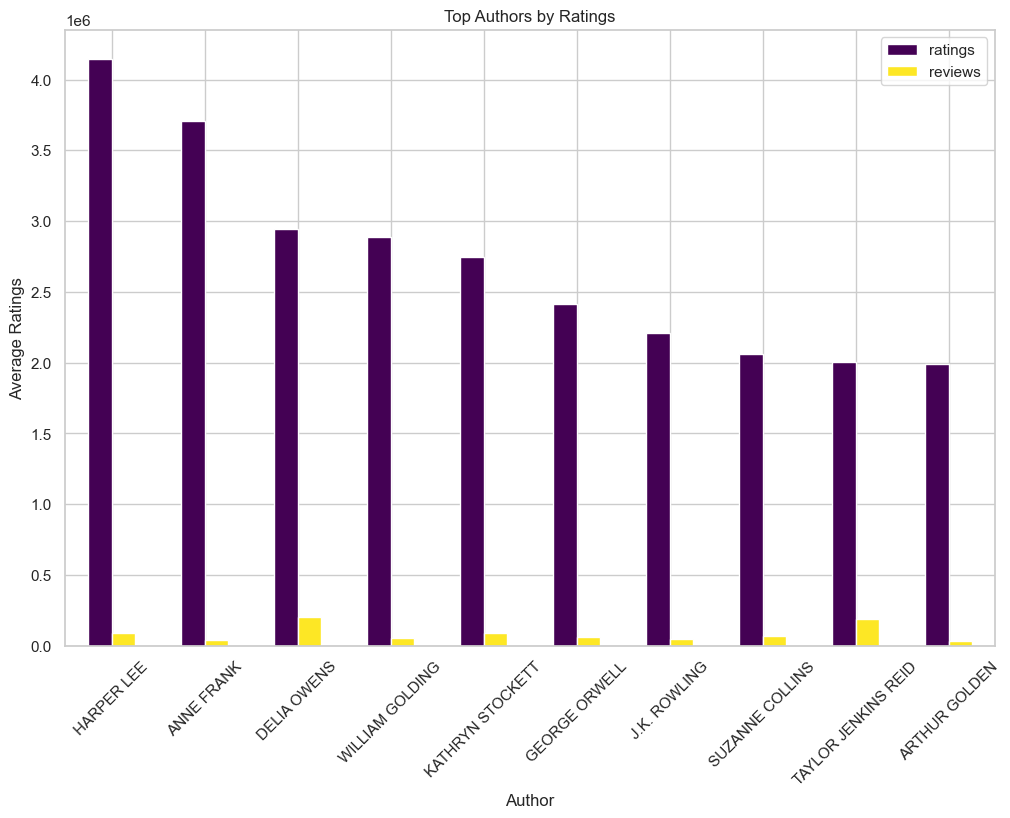

In [30]:
top_avg_ratings[:10].plot(kind='bar', figsize=(12, 8), cmap='viridis')
plt.title('Top Authors by Ratings')
plt.xlabel('Author')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

In [31]:
# Sort the DataFrame by reviews in descending order

top_avg_reviews = avg_ratings_reviews.sort_values(by='reviews', ascending=False)

print("Top Authors by Reviews:\n")
print(top_avg_reviews)

Top Authors by Reviews:

                     ratings  reviews
author                               
DELIA OWENS          2945949   201511
TAYLOR JENKINS REID  2003106   189100
REBECCA YARROS       1171012   157508
MADELINE MILLER      1314801   137543
ALEX MICHAELIDES     1208844   111421
...                      ...      ...
CHRIS A. JONES           489        2
LISA CHERRY               17        2
MARY LEBAR                 7        1
RUSSELL ASH               29        1
KATHERYN KIMBROUGH        14        0

[3210 rows x 2 columns]


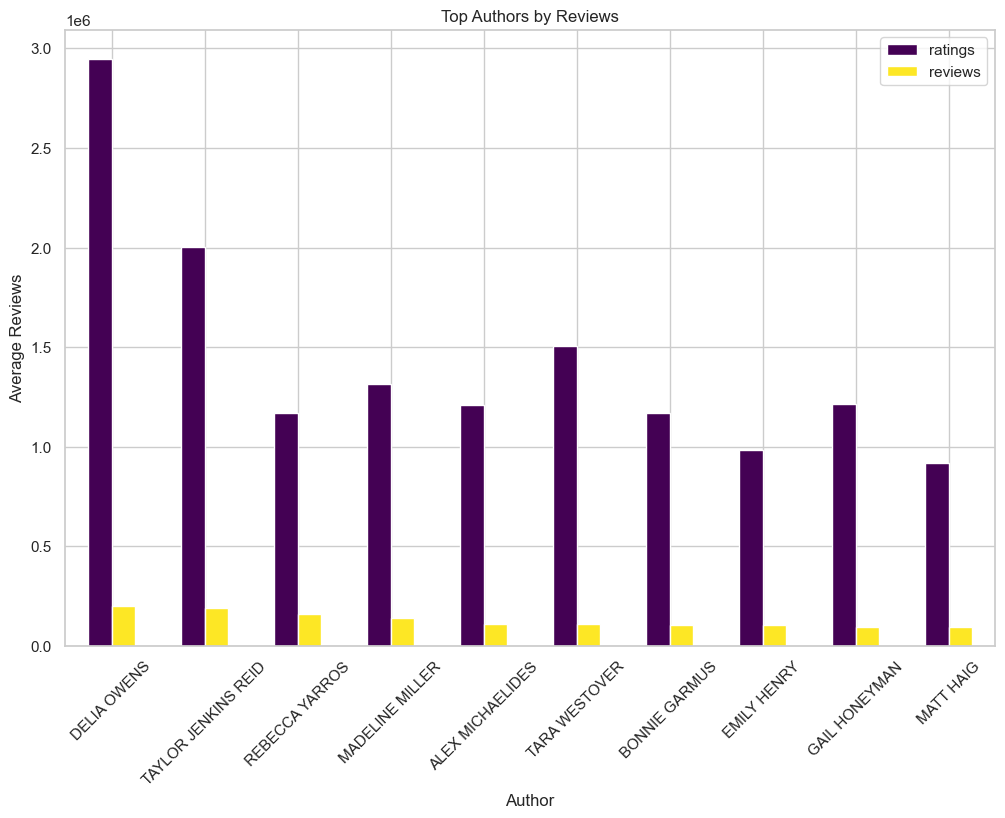

In [32]:
top_avg_reviews[:10].plot(kind='bar', figsize=(12, 8), cmap='viridis')
plt.title('Top Authors by Reviews')
plt.xlabel('Author')
plt.ylabel('Average Reviews')
plt.xticks(rotation=45)
plt.show()

###  3.3. Investigate Genre Distribution:

In [34]:
genre_distribution = books_g.groupby('author')['genre'].value_counts().unstack(fill_value=0)
genre_distribution.head()

genre,Children,Classics,Comics,Contemporary,Cultural,Erotica,Fantasy,Fiction,Gaming,Historical,...,Mystery/Thriller,New Adult,Nonfiction,Paranormal,Personal Development,Poetry,Religion/Spirituality,Romance,Science Fiction,Young Adult
author,,,,,,,,,,,,,,,,,,,,,
A. KIRK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
A.A. MILNE,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A.C. GAUGHEN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A.D. ZOLTAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
A.F. KNOTT,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


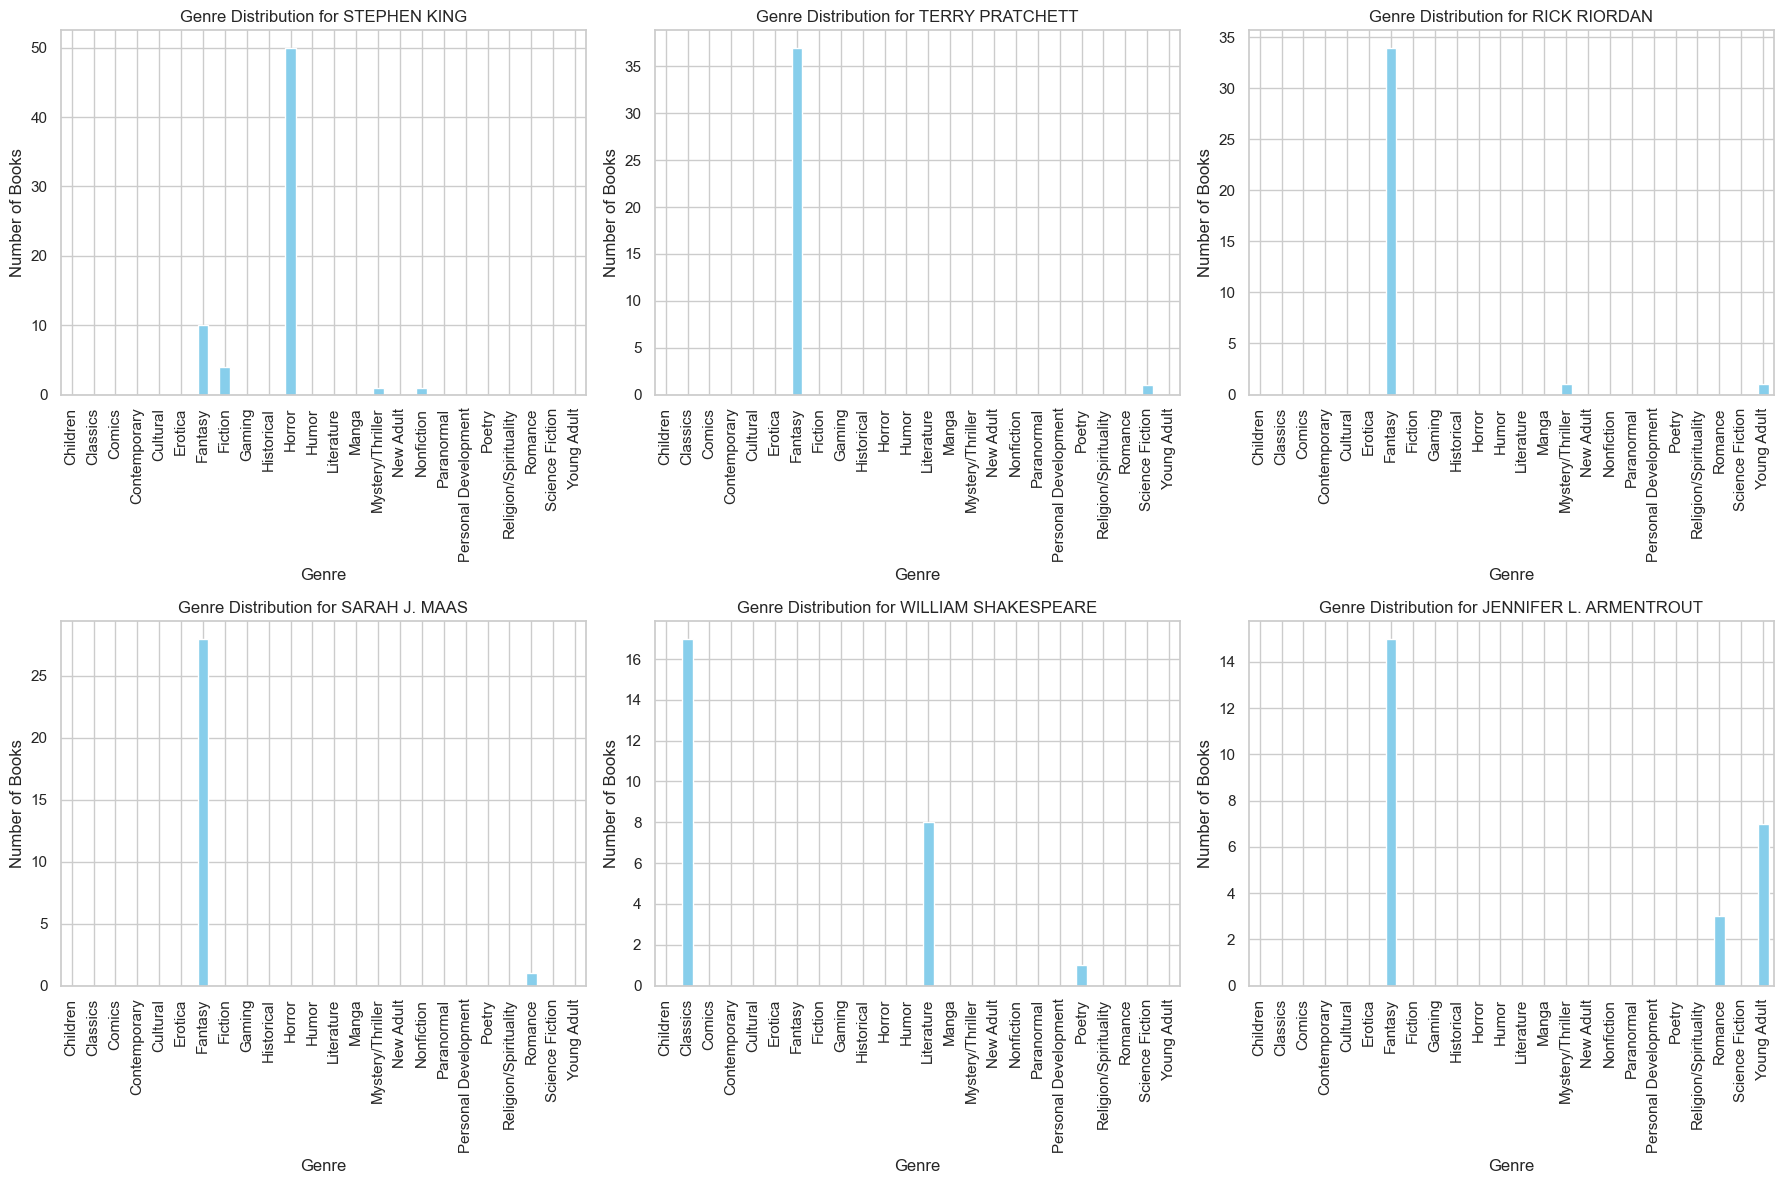

In [35]:
# Visualize Genre Distribution for Top Authors

top_authors = prolific_authors[:6].index

num_rows = 2
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

for i, author in enumerate(top_authors):
    row = i // num_cols
    col = i % num_cols
    genre_distribution.loc[author].plot(kind='bar', ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'Genre Distribution for {author}')
    axes[row, col].set_xlabel('Genre')
    axes[row, col].set_ylabel('Number of Books')
    axes[row, col].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap of labels
plt.tight_layout()
plt.show()


In [38]:
# Calculate the number of unique genres for each author
unique_genre_counts = books_g.groupby('author')['genre'].nunique()

# Filter authors with multiple genres
authors_multiple_genres = unique_genre_counts[unique_genre_counts > 1].index

# Display authors with multiple genres
print("Authors with books across multiple genres:")
authors_multiple_genres

Authors with books across multiple genres:


Index(['A.A. MILNE', 'A.R. MERRYDEW', 'ABBI GLINES', 'ADAM NICKE',
       'ADAM SILVERA', 'AHLAM MOSTEGHANEMI', 'AIMEE CARTER', 'ALBERT CAMUS',
       'ALDOUS HUXLEY', 'ALEKSANDR SOLZHENITSYN',
       ...
       'WILLIAM FAULKNER', 'WILLIAM GIBSON', 'WILLIAM KELY MCCLUNG',
       'WILLIAM SHAKESPEARE', 'WILLIAM STYRON', 'WILSON RAWLS', 'YANGSZE CHOO',
       'ZOLTAN ANDREJKOVICS', 'ÉMILE ZOLA', 'مصطفى محمود'],
      dtype='object', name='author', length=387)

In [39]:
# number of authors with books across multiple genres

len(authors_multiple_genres)

387

##  Explore the distribution of genres within the works of Stephen King and Terry Pratchett. 

<Figure size 1200x800 with 0 Axes>

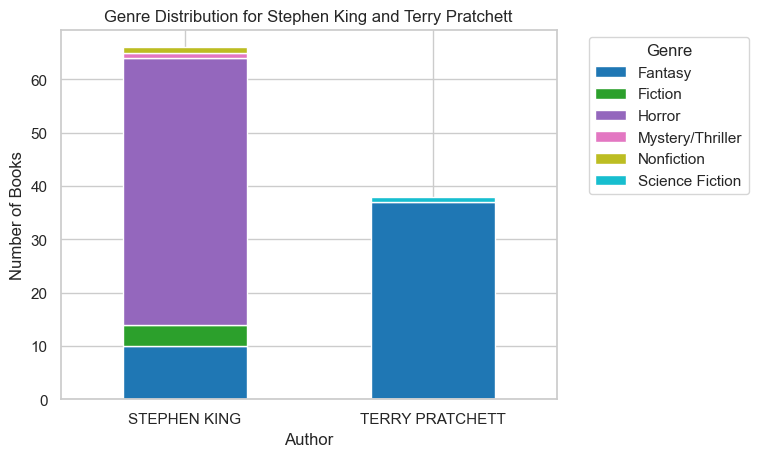

In [41]:
# Filter books by authors Mitch Albom and Rick Riordan
filtered_books = books_g[books_g['author'].isin(['STEPHEN KING', 'TERRY PRATCHETT'])]

# Count the occurrences of each genre for each author
genre_counts_by_author = filtered_books.groupby(['author', 'genre']).size().unstack(fill_value=0)

# Plot genre distribution for each author
plt.figure(figsize=(12, 8))
genre_counts_by_author.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Genre Distribution for Stephen King and Terry Pratchett')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=0)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show();

### 3.4. Visualize Author Rankings:

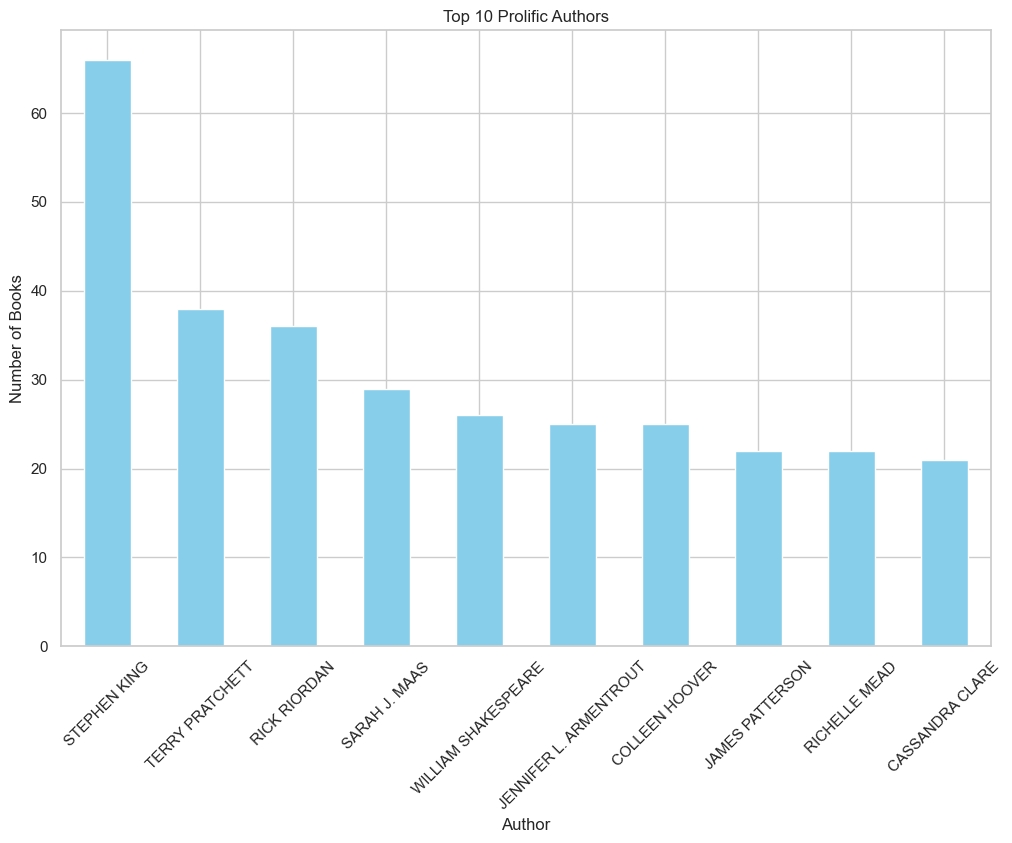

In [42]:
plt.figure(figsize=(12, 8))
prolific_authors[:10].plot(kind='bar', color='skyblue')
plt.title('Top 10 Prolific Authors')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

# 4. **Price Analysis:**
   - Analyze the distribution of book prices.
   - Compare the average prices across different genres or authors.
   - Identify price trends over time.
   - Investigate the relationship between book prices and ratings/reviews.

### 4.1. Distribution of Book Prices:

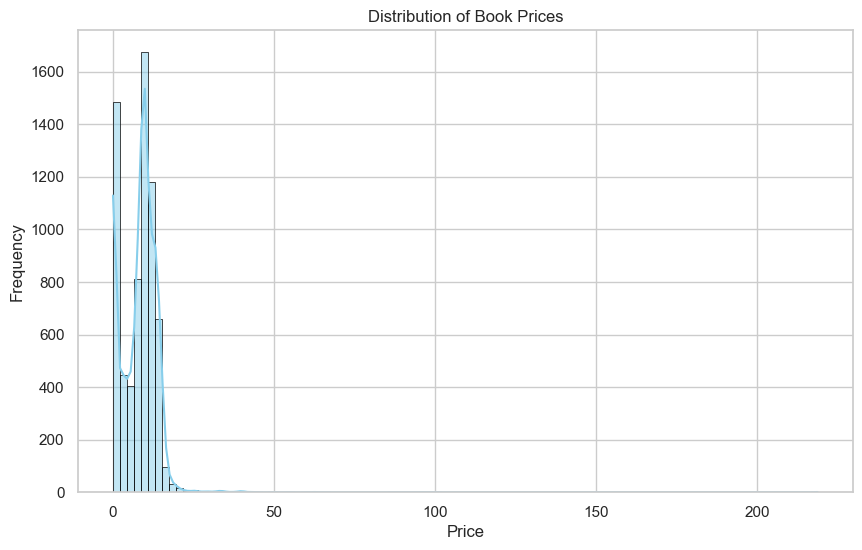

In [43]:
# Plotting histogram
plt.figure(figsize=(10, 6))
sns.histplot(books_g['price'], bins=100, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [44]:
# Analyzing central tendency, dispersion, and shape

mean_price = books_g['price'].mean()
median_price = books_g['price'].median()
std_dev_price = books_g['price'].std()

print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Prices: {std_dev_price}")

Mean Price: 7.961272833552534
Median Price: 8.99
Standard Deviation of Prices: 6.005487024000793


### 4.2.Comparison of Average Prices:

In [45]:
# Calculate average prices across different genres
average_prices_genre = books_g.groupby('genre')['price'].mean().sort_values(ascending = False).round(2)
average_prices_genre.head()

genre
Nonfiction              9.65
Fiction                 9.35
Personal Development    9.33
Historical              9.06
Young Adult             8.25
Name: price, dtype: float64

In [46]:
# Calculate average prices across different authors

average_prices_author = books_g.groupby('author')['price'].mean().sort_values(ascending = False).round(2)
average_prices_author.head()

author
PATRICK O'BRIAN                         79.57
LAWRENCE DURRELL                        38.99
R. SCOTT ARNELL                         37.14
RUMI (JALAL AD-DIN MUHAMMAD AR-RUMI)    34.30
NIKOLAS SCHRECK                         32.00
Name: price, dtype: float64

In [47]:
# Calculate average prices across different publication years

average_prices_year = books_g.groupby('published_year')['price'].mean().sort_values(ascending = False).round(2)
average_prices_year.head()

published_year
1273    34.30
1532    14.49
1870    13.49
1994    13.26
1010    12.99
Name: price, dtype: float64

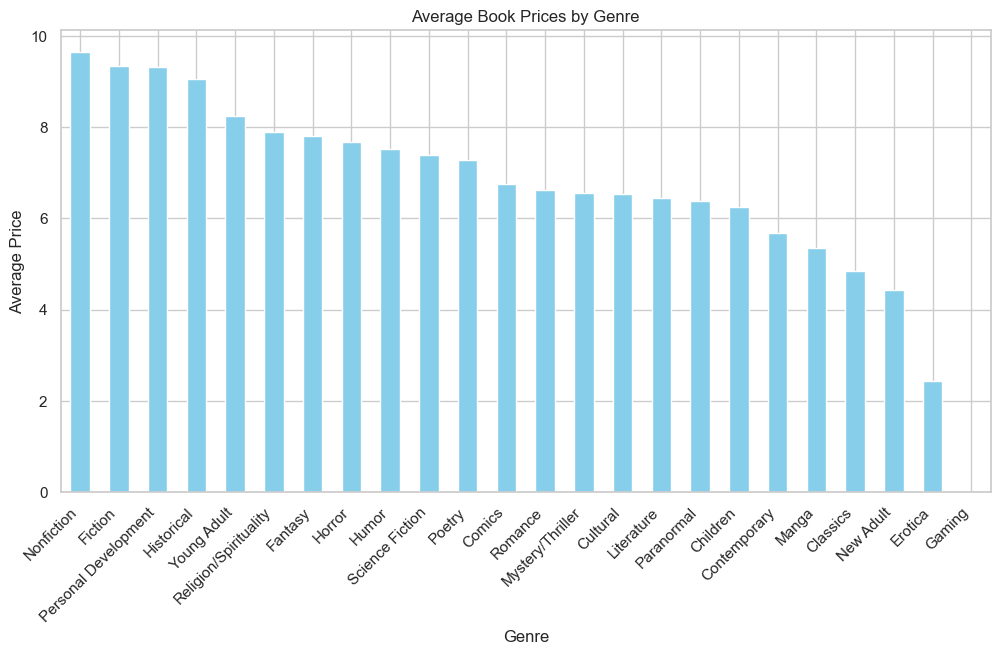

In [48]:
# Visualization - Bar plots

plt.figure(figsize=(12, 6))
average_prices_genre.plot(kind='bar', color='skyblue')
plt.title('Average Book Prices by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

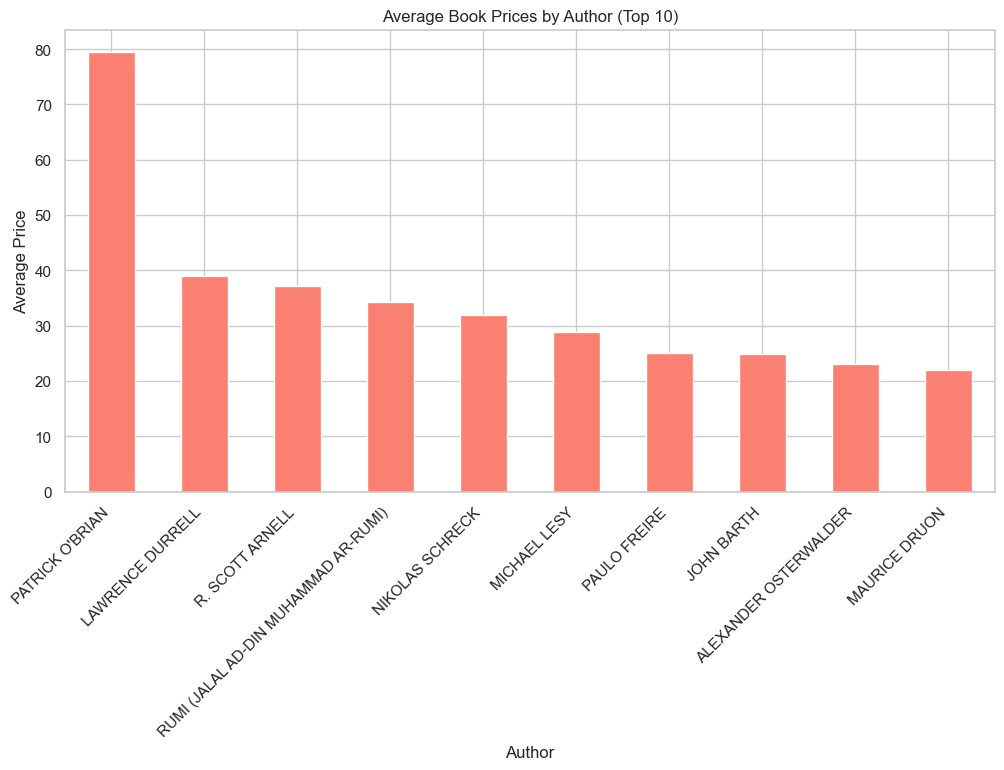

In [49]:
plt.figure(figsize=(12, 6))
average_prices_author.head(10).plot(kind='bar', color='salmon')
plt.title('Average Book Prices by Author (Top 10)')
plt.xlabel('Author')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()

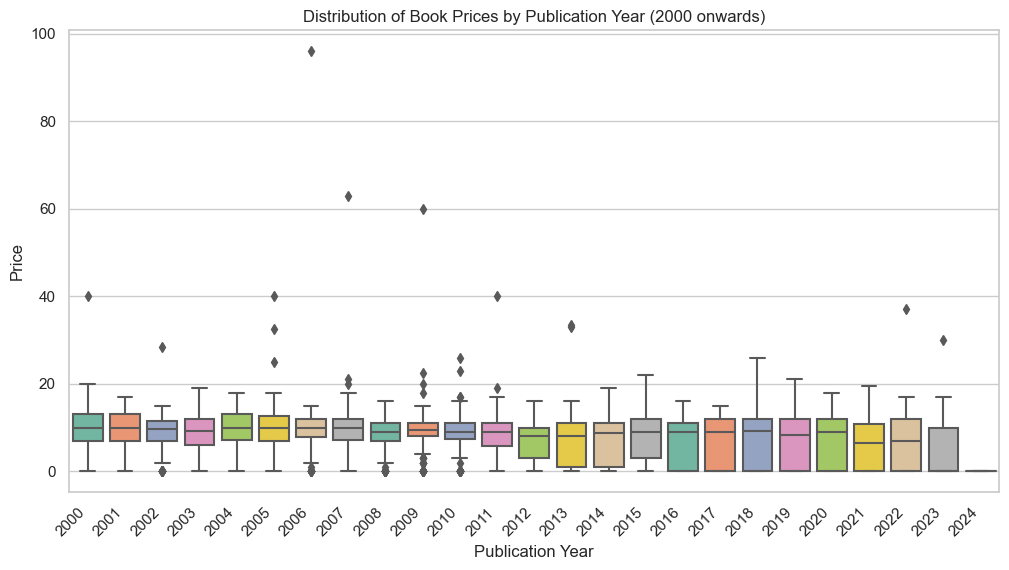

In [51]:
# Filter the DataFrame to include only data from 2000 onwards

books_f_from_2000 = books_g[books_g['published_year'] >= 2000]

# Visualization - Box plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='published_year', y='price', data=books_f_from_2000, palette='Set2')
plt.title('Distribution of Book Prices by Publication Year (2000 onwards)')
plt.xlabel('Publication Year')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show()

### 4.3. Price Trends Over Time:

In [53]:
# Aggregate data by year

price_trends_year = books_g.groupby('published_year')['price'].mean()
price_trends_year.head()

published_year
1000     1.99
1001    11.99
1002    10.99
1010    12.99
1120     1.99
Name: price, dtype: float64

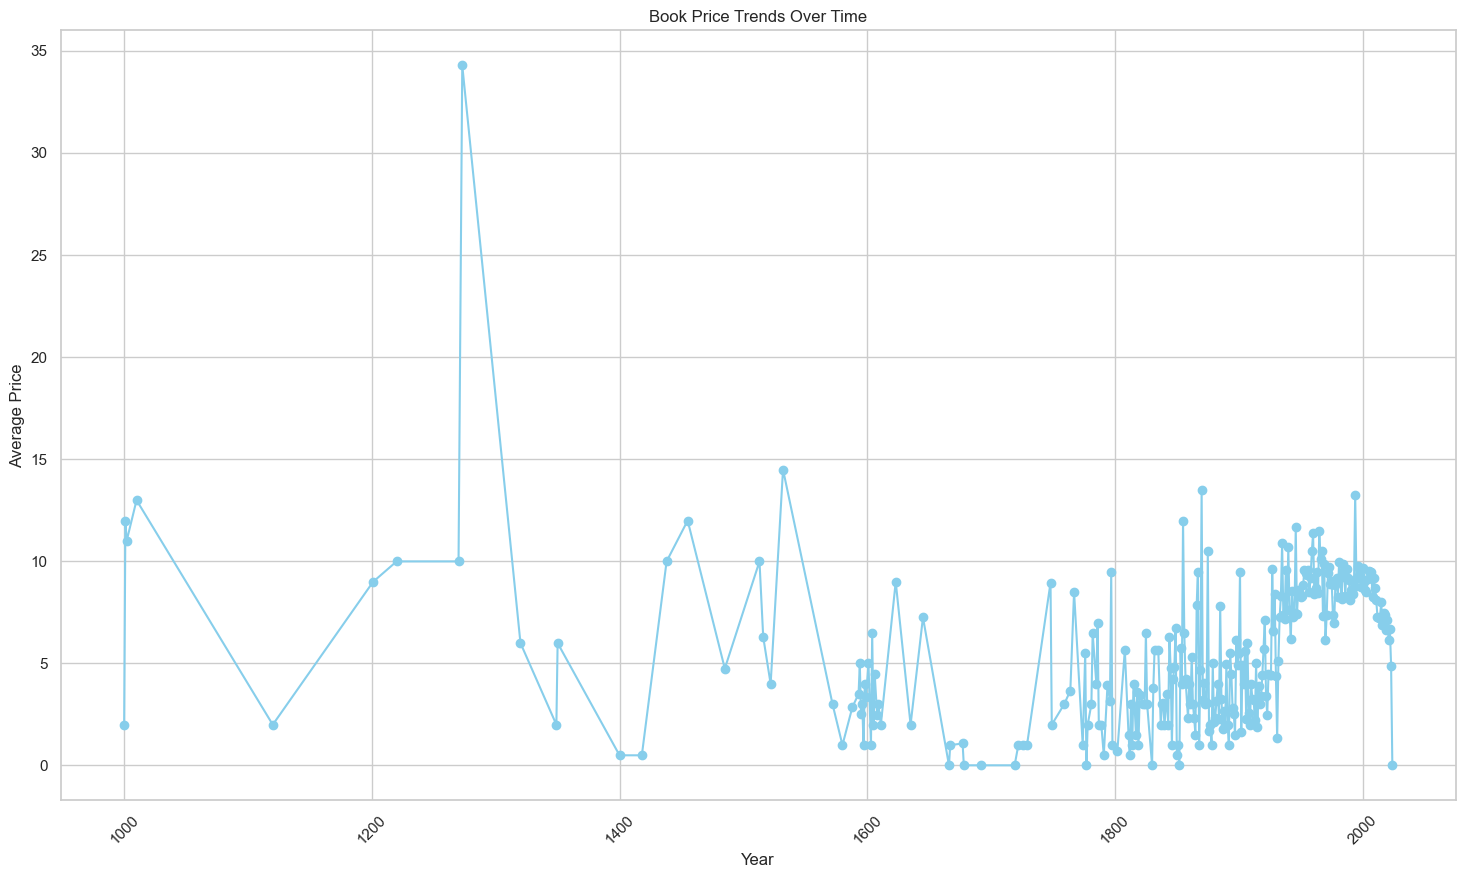

In [54]:
# Plotting time series graph

plt.figure(figsize=(18, 10))
price_trends_year.plot(marker='o', color='skyblue', linestyle='-')
plt.title('Book Price Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### 4.4. Relationship Between Prices and Ratings/Reviews:

In [55]:
# Calculate correlation coefficients

correlation_matrix = books_g[['price', 'ratings', 'reviews']].corr()
correlation_matrix

,price,ratings,reviews
price,1.000000,0.016102,0.068038
ratings,0.016102,1.000000,0.781492
reviews,0.068038,0.781492,1.000000


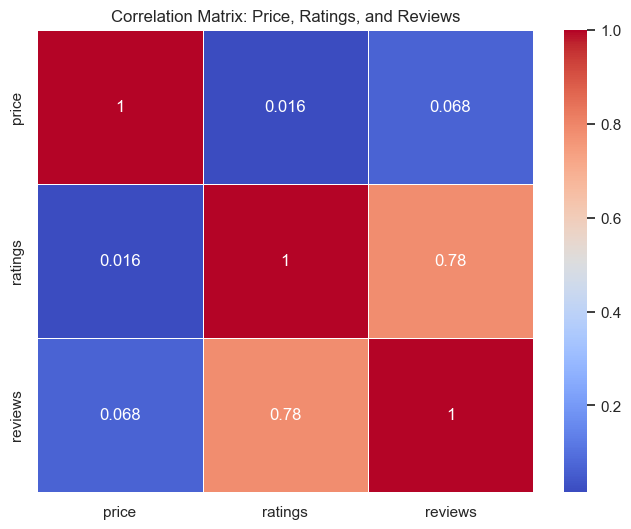

In [56]:
# Visualize correlation matrix as a heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix: Price, Ratings, and Reviews')
plt.show()

- There is a weak positive correlation between 'price' and 'ratings'.
- There is a weak positive correlation between 'price' and 'reviews'.
- There is a strong positive correlation between 'ratings' and 'reviews'.

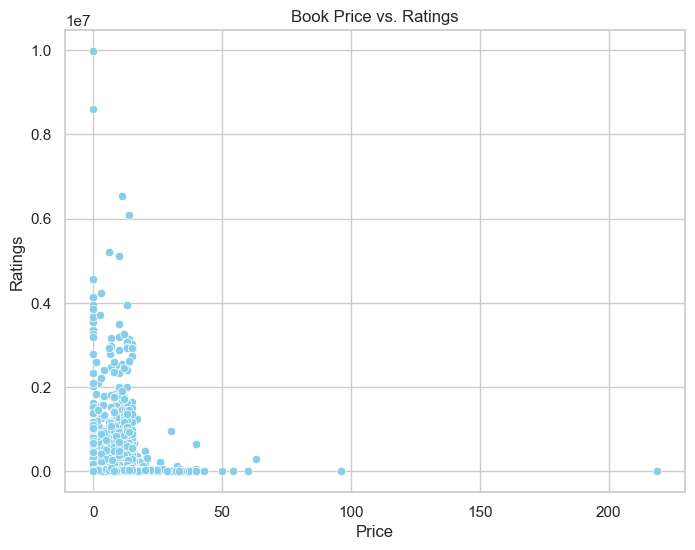

In [58]:
# Create scatter plot for Price vs. Ratings

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='ratings', data=books_g, color='skyblue')
plt.title('Book Price vs. Ratings')
plt.xlabel('Price')
plt.ylabel('Ratings')
plt.grid(True)
plt.show()

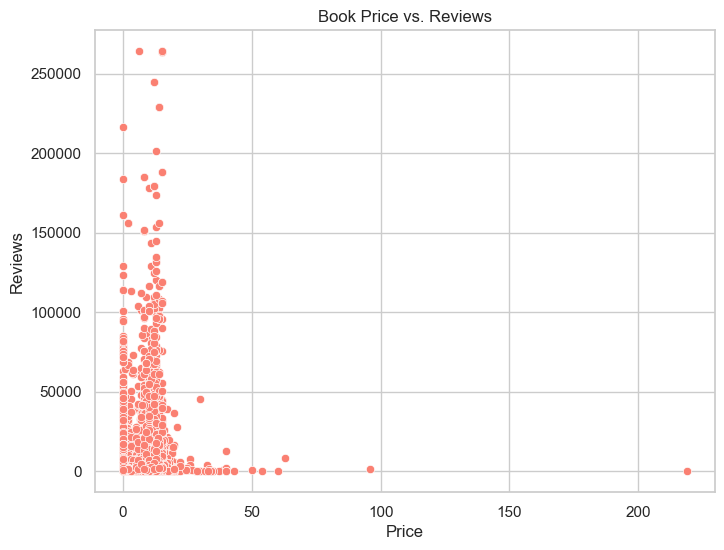

In [59]:
# Create scatter plot for Price vs. Reviews

plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='reviews', data=books_g, color='salmon')
plt.title('Book Price vs. Reviews')
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.grid(True)
plt.show()

# 5. **Rating and Review Analysis:**
   - Explore the distribution of ratings and reviews.
   - Analyze the relationship between ratings and reviews.
   - Identify outliers and anomalies in the rating/review distributions.
   - Investigate factors influencing high and low ratings.


### 5.1.Distribution of Ratings and Reviews:

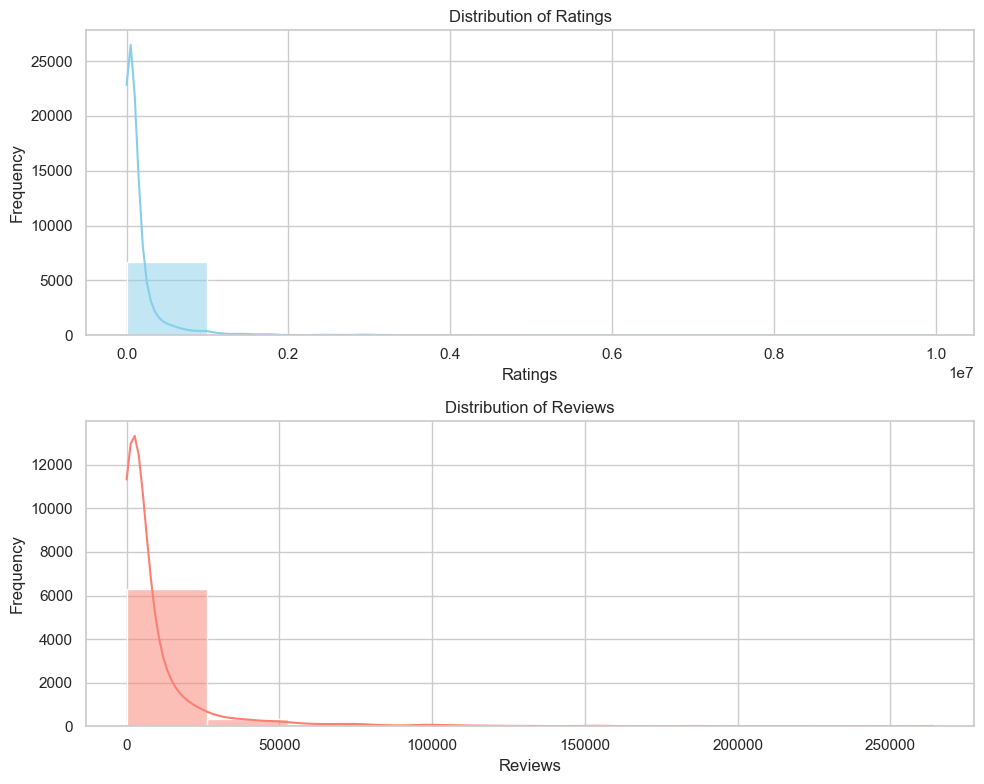

In [60]:
# Set up the figure and axes for plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot histogram for ratings
sns.histplot(books_g.ratings, bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Ratings')
axes[0].set_xlabel('Ratings')
axes[0].set_ylabel('Frequency')

# Plot histogram for reviews
sns.histplot(books_g.reviews, bins=10, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Reviews')
axes[1].set_xlabel('Reviews')
axes[1].set_ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

### 5.2. Relationship Between Ratings and Reviews:

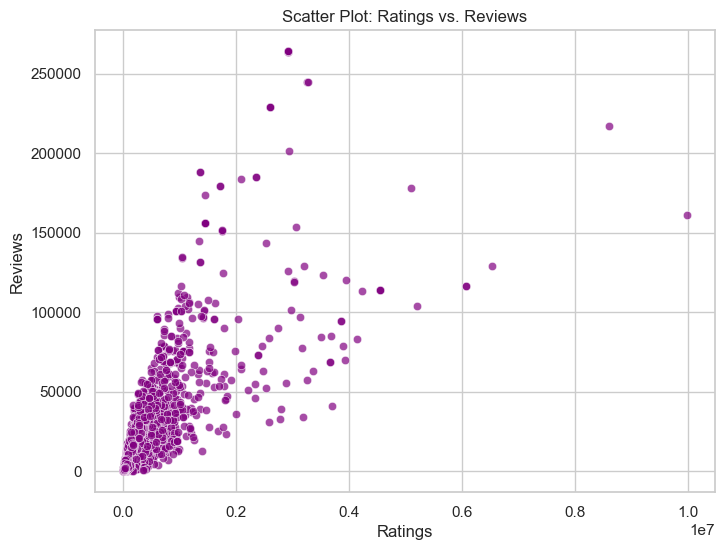

In [61]:
# Scatter plot for ratings vs. reviews

plt.figure(figsize=(8, 6))
sns.scatterplot(x=books_g.ratings, y=books_g.reviews, color='purple', alpha=0.7)
plt.title('Scatter Plot: Ratings vs. Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews');


Pearson Correlation Coefficient: 0.7814923073586626


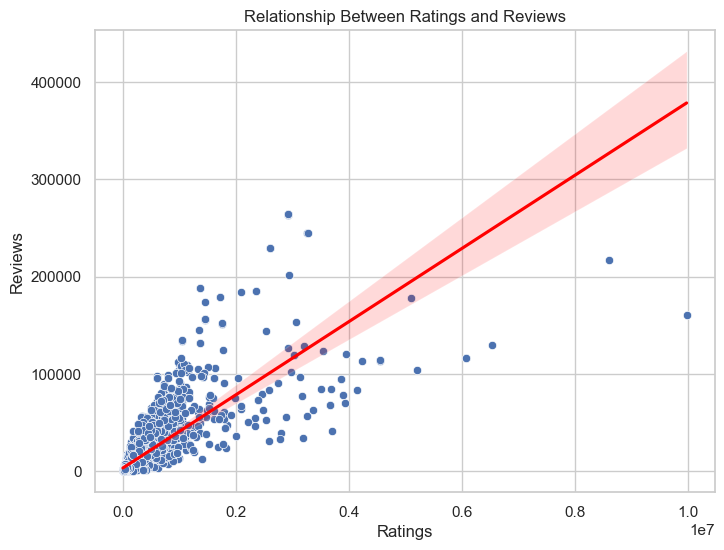

In [62]:
# Calculate Pearson correlation coefficient

correlation_coefficient, _ = pearsonr(books_g.ratings, books_g.reviews)
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x='ratings', y='reviews', data=books_g)

# Add regression line
sns.regplot(x='ratings', y='reviews', data=books_g, scatter=False, color='red')

plt.title('Relationship Between Ratings and Reviews')
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.grid(True)
plt.show()


- A Pearson correlation coefficient of 0.7814 indicates a strong positive correlation between ratings and reviews. This means that as ratings increase, reviews tend to increase as well, and vice versa. The correlation coefficient being close to 1 suggests that there is a linear relationship between ratings and reviews.

### 5.3. Identification of Outliers and Anomalies:

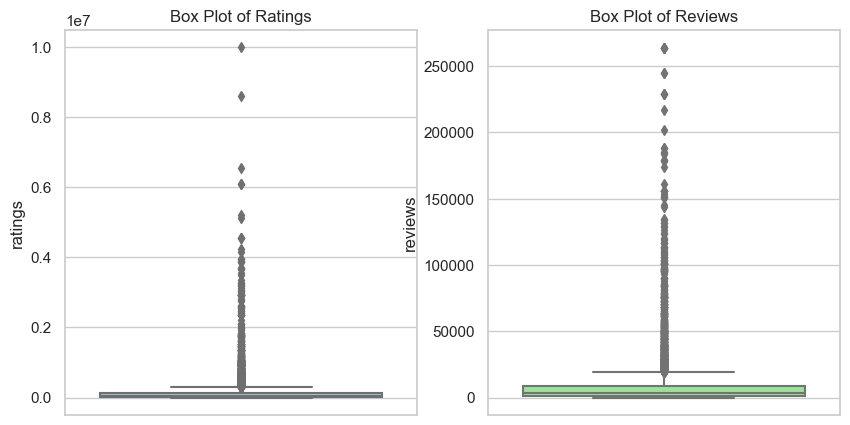

In [63]:
# Plot box plots for ratings and reviews
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y='ratings', data=books_g, color='skyblue')
plt.title('Box Plot of Ratings')

plt.subplot(1, 2, 2)
sns.boxplot(y='reviews', data=books_g, color='lightgreen')
plt.title('Box Plot of Reviews')

plt.show()


In [64]:
# Calculate Z-scores for ratings and reviews
z_scores_ratings = (books_g['ratings'] - books_g['ratings'].mean()) / books_g['ratings'].std()
z_scores_reviews = (books_g['reviews'] - books_g['reviews'].mean()) / books_g['reviews'].std()

In [65]:
# Define threshold for outlier detection (e.g., 3 or -3)
threshold = 3

# Identify outliers based on Z-scores
outliers_ratings = books_g[np.abs(z_scores_ratings) > threshold]
print("Outliers in Ratings:")
outliers_ratings.head()


Outliers in Ratings:


,title,author,stars,ratings,reviews,synopsis,genre,version,price,number_of_pages,book_format,published_date,published_year,num_books_author,followers_author
0,The Hunger Games,SUZANNE COLLINS,4.34,8601389,216773,"Could you survive on your own in the wild, wit...",Young Adult,Kindle Unlimited,0.00,374,Hardcover,"September 14, 2008",2008,72,997000
1,Harry Potter and the Order of the Phoenix,J.K. ROWLING,4.50,3359608,62879,Harry Potter is about to start his fifth year ...,Young Adult,Kindle Unlimited,0.00,912,Paperback,"June 21, 2003",2003,535,225000
2,Pride and Prejudice,JANE AUSTEN,4.29,4238613,113179,"Since its immediate success in 1813, Pride and...",Classics,Kindle,2.99,279,Paperback,"January 28, 1813",1813,4124,663000
3,To Kill a Mockingbird,HARPER LEE,4.26,6079471,116454,The unforgettable novel of a childhood in a sl...,Classics,Kindle,13.99,323,Paperback,"July 11, 1960",1960,70,135000
4,The Book Thief,MARKUS ZUSAK,4.39,2538383,143787,Librarian's note: An alternate cover edition c...,Historical,Kindle,10.99,592,Hardcover,"September 1, 2005",2005,23,392000


In [66]:
outliers_reviews = books_g[np.abs(z_scores_reviews) > threshold]
print("\nOutliers in Reviews:")
outliers_reviews.head()


Outliers in Reviews:


,title,author,stars,ratings,reviews,synopsis,genre,version,price,number_of_pages,book_format,published_date,published_year,num_books_author,followers_author
0,The Hunger Games,SUZANNE COLLINS,4.34,8601389,216773,"Could you survive on your own in the wild, wit...",Young Adult,Kindle Unlimited,0.00,374,Hardcover,"September 14, 2008",2008,72,997000
2,Pride and Prejudice,JANE AUSTEN,4.29,4238613,113179,"Since its immediate success in 1813, Pride and...",Classics,Kindle,2.99,279,Paperback,"January 28, 1813",1813,4124,663000
3,To Kill a Mockingbird,HARPER LEE,4.26,6079471,116454,The unforgettable novel of a childhood in a sl...,Classics,Kindle,13.99,323,Paperback,"July 11, 1960",1960,70,135000
4,The Book Thief,MARKUS ZUSAK,4.39,2538383,143787,Librarian's note: An alternate cover edition c...,Historical,Kindle,10.99,592,Hardcover,"September 1, 2005",2005,23,392000
5,Twilight,STEPHENIE MEYER,3.65,6535001,129330,About three things I was absolutely positive.\...,Young Adult,Kindle,10.99,498,Paperback,"October 5, 2005",2005,94,75000


- The presence of books with exceptionally high ratings or reviews does not necessarily make them outliers in the dataset. Books with a high number of ratings or reviews could be attributed to factors such as the author's fame or the book's popularity and success.